<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Assignment/Assignment5/q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset for the assignment is a brain tumor data (brain tumor dataset.csv) that
has 20 columns and 20000 rows. The first objective is to classify the data based on tumor
type. You can use the 80:20 train-test split ratio.
(a) Build a Support vector machine classifier model to classify whether a tumor is
benign or malignant. [Marks:15]
(b) Plot the AUC-ROC curve for the model built. Also print the classification report.
[Marks:10]
(c) Use PCA to reduce the dimension to 2 features. Build a classifier model with this
data and plot the hyperplane and margins. [Marks:15]

In [1]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import svm

from sklearn.svm import LinearSVC, SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('./brain_tumor_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [3]:
df = df.drop('Patient_ID',axis=1)
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [4]:
df.isnull().sum()

Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [5]:
for i in df:
    print(df[i].unique())

[73 26 31 29 54 27 72 61 50 79 58 71 62 37 20 67 65 36 46 55 76 49 41 38
 63 44 56 70 42 64 48 52 78 23 39 33 32 34 30 25 75 43 47 28 60 66 35 57
 22 21 59 69 45 40 51 74 24 53 68 77]
['Male' 'Female']
['Malignant' 'Benign']
[5.37561155 4.84709779 5.58839071 ... 3.61863429 8.5190863  9.71676844]
['Temporal' 'Parietal' 'Frontal' 'Occipital']
['Astrocytoma' 'Glioblastoma' 'Meningioma' 'Medulloblastoma']
['III' 'II' 'I' 'IV']
['Vision Issues' 'Headache' 'Seizures' 'Nausea']
['Seizures' 'Headache' 'Vision Issues' 'Nausea']
['Seizures' 'Nausea' 'Headache' 'Vision Issues']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
[51.31257903 46.37327271 47.07222097 ... 89.54380317 83.30678093
 47.43346759]
[0.11187562 2.16573562 1.88422778 ... 2.33288086 2.38720166 2.46407721]
['No' 'Yes']
['Positive' 'Negative']
['Yes' 'No']


In [6]:
df.shape

(20000, 18)

In [7]:
# dividing the columns into types

binary_cols = ['Gender', 'Radiation_Treatment', 'Surgery_Performed',
                'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required','Tumor_Type']
categorical_cols = ['Location', 'Histology', 'Symptom_1', 'Symptom_2', 'Symptom_3']
numeric_cols = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']
ordinal_cols = ['Stage']

# encode Tumor_Type seperately in the end -> binaryencoding

# binary_cols --> BinaryEncoding
# categorical_cols --> OneHotEncoding
# Stage --> OrdinalEncoding

In [8]:
# Plotting the data to see if there is class imbalance

# y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
# plt.ylabel('')
# plt.legend()
# plt.title('Target Variable Distribution')
# plt.show()

In [9]:
# Create label encoder for binary columns
label_encoder = LabelEncoder()
onehot = OneHotEncoder(sparse_output=False)

ordinal_categories = [['I', 'II', 'III', 'IV']]
ordinal = OrdinalEncoder(categories=ordinal_categories)


# Create a copy of X to avoid modifying the original dataframe
df_encoded = df.copy()

# Encode binary columns using LabelEncoder
for col in binary_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Encode categorical columns using OneHotEncoder

categorical_encoded = onehot.fit_transform(df_encoded[categorical_cols])
categorical_feature_names = onehot.get_feature_names_out(categorical_cols)

# Encode ordinal column (Stage)

df_encoded[ordinal_cols] = ordinal.fit_transform(df_encoded[ordinal_cols])

# Convert categorical encoded array to dataframe
categorical_df = pd.DataFrame(categorical_encoded, columns=categorical_feature_names)

# Drop original categorical columns and concatenate with one-hot encoded columns
df_encoded = df_encoded.drop(columns=categorical_cols)
df_encoded = pd.concat([df_encoded, categorical_df], axis=1)

df_encoded.head()


,Age,Gender,Tumor_Type,Tumor_Size,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,...,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues
0,73,1,1,5.375612,2.0,0,0,0,51.312579,0.111876,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,26,1,0,4.847098,1.0,1,1,1,46.373273,2.165736,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31,1,0,5.588391,0.0,0,0,0,47.072221,1.884228,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,29,1,1,1.436600,3.0,1,0,1,51.853634,1.283342,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,54,0,0,2.417506,0.0,0,0,1,54.708987,2.069477,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df_encoded.columns

Index(['Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Stage',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required', 'Location_Frontal', 'Location_Occipital',
       'Location_Parietal', 'Location_Temporal', 'Histology_Astrocytoma',
       'Histology_Glioblastoma', 'Histology_Medulloblastoma',
       'Histology_Meningioma', 'Symptom_1_Headache', 'Symptom_1_Nausea',
       'Symptom_1_Seizures', 'Symptom_1_Vision Issues', 'Symptom_2_Headache',
       'Symptom_2_Nausea', 'Symptom_2_Seizures', 'Symptom_2_Vision Issues',
       'Symptom_3_Headache', 'Symptom_3_Nausea', 'Symptom_3_Seizures',
       'Symptom_3_Vision Issues'],
      dtype='object')

In [11]:
X=df_encoded.drop(['Tumor_Type'],axis=1)
y = df_encoded['Tumor_Type']

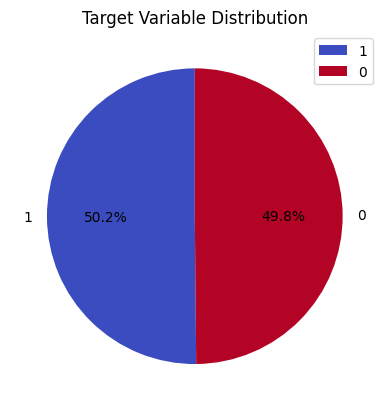

In [12]:
# Plotting the data to see if there is class imbalance

y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.ylabel('')
plt.legend()
plt.title('Target Variable Distribution')
plt.show()

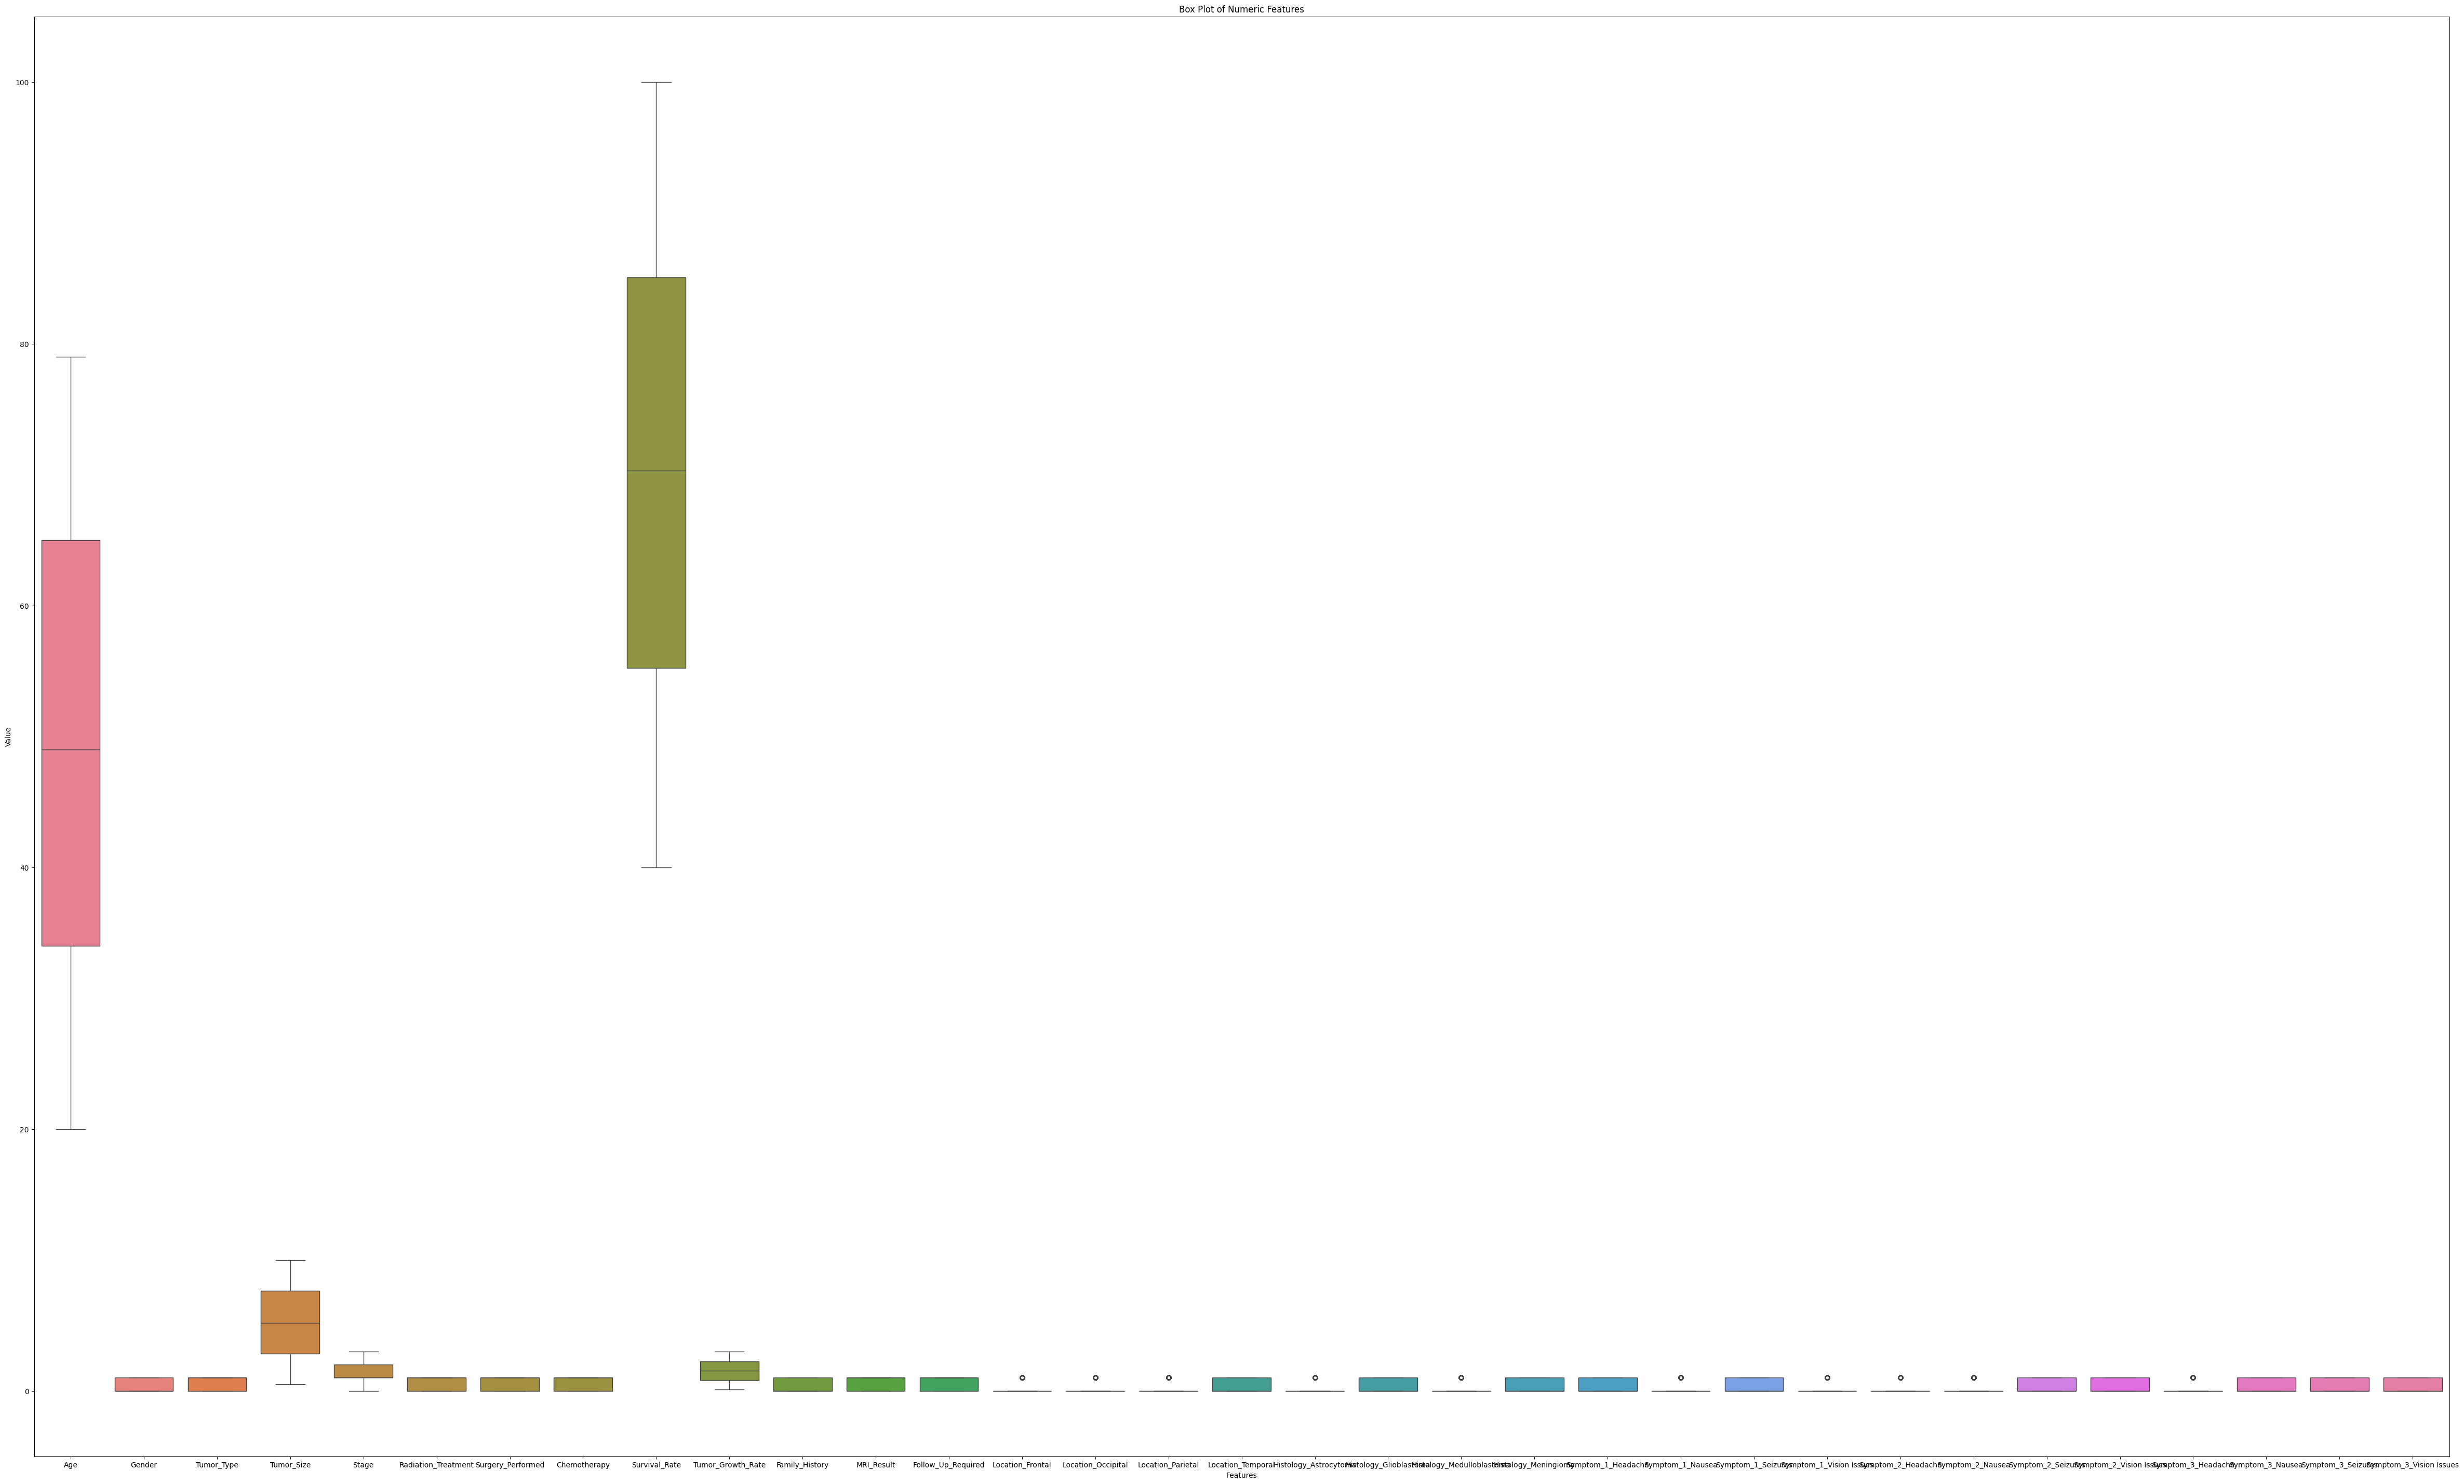

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a box plot to see scale of the datas

plt.figure(figsize=(60,36))
sns.boxplot(data=df_encoded)
plt.title("Box Plot of Numeric Features")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()


In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [15]:
scaler = StandardScaler()

# Apply the scaler only to the selected columns
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [16]:
y_train.head()

10213    1
3210     0
2443     1
4445     1
9192     1
Name: Tumor_Type, dtype: int64

In [17]:
X_train_scl.shape , X_test_scl.shape , y_train.shape , y_test.shape

((16000, 32), (4000, 32), (16000,), (4000,))

In [26]:
clf_1 = LinearSVC().fit(X_train_scl, y_train)  # possible to state loss='hinge'
clf_2 = SVC(kernel='linear').fit(X_train_scl, y_train)

score_1 = clf_1.score(X_train_scl, y_train)
score_2 = clf_2.score(X_train_scl, y_train)

print('LinearSVC training accuracy score %s' % score_1)
print('SVC training accuracy score %s' % score_2)

LinearSVC training accuracy score 0.5115
SVC training accuracy score 0.512625


In [19]:
# Print training accuracy for each model
y_train_pred = clf_1.predict(X_train_scl)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy of LinearSVC: {train_accuracy:.3f}")

y_train_pred1 = clf_2.predict(X_train_scl)
train_accuracy = accuracy_score(y_train, y_train_pred1)
print(f"Training accuracy of SVC: {train_accuracy:.3f}")

Training accuracy of LinearSVC: 0.511
Training accuracy of SVC: 0.513


In [ ]:
# starting all models

C = 1.0
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma='scale', C=C),
)

models = (clf.fit(X, y) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# polynomial kernel is taking more than 3 hrs to execute

In [ ]:

from sklearn.metrics import accuracy_score

accuracy_scores = []

for clf, title in zip(models, titles):
    y_pred = clf.predict(X_test_scl)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Test Accuracy of {title}: {accuracy}")


d:\Documents\Github\masters-practise-repo\TERM2\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy of SVC with linear kernel: 0.528
Accuracy of LinearSVC (linear kernel): 0.528


d:\Documents\Github\masters-practise-repo\TERM2\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
d:\Documents\Github\masters-practise-repo\TERM2\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy of SVC with RBF kernel: 0.501


In [22]:
clf_3 = svm.SVC(kernel="poly", degree=3, gamma="scale", C=C).fit(X_train_scl, y_train)

In [24]:
score_3 = clf_3.score(X_train_scl, y_train)

In [ ]:
print('Polynomial Kernel of degree 3 training accuracy score %s' % score_3)

0.6786875

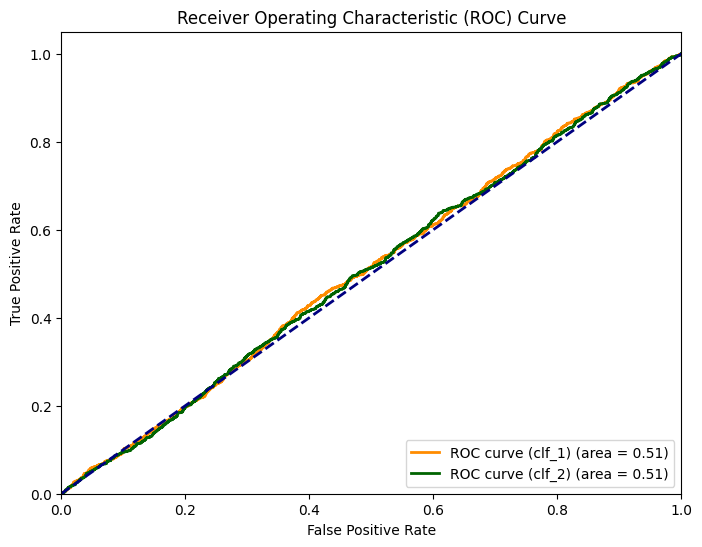

Classification Report for clf_1:
              precision    recall  f1-score   support

           0       0.51      0.35      0.41      1996
           1       0.50      0.66      0.57      2004

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.49      4000
weighted avg       0.50      0.50      0.49      4000


Classification Report for clf_2:


d:\Documents\Github\masters-practise-repo\TERM2\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
d:\Documents\Github\masters-practise-repo\TERM2\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1996
           1       0.51      0.47      0.49      2004

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.50      4000
weighted avg       0.51      0.51      0.50      4000



In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



y_pred_proba_1 = clf_1.decision_function(X_test_scl) # decision_function for LinearSVC
y_pred_proba_2 = clf_2.decision_function(X_test_scl) # decision_function for SVC

# y_pred_proba_3 = clf_3.decision_function(X_test_scl)

# Calculate ROC curve and AUC for clf_1
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_1)
roc_auc1 = auc(fpr1, tpr1)

# Calculate ROC curve and AUC for clf_2
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_2)
roc_auc2 = auc(fpr2, tpr2)


# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC curve (clf_1) (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='darkgreen', lw=2, label=f'ROC curve (clf_2) (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification reports
print("Classification Report for clf_1:")
print(classification_report(y_test, clf_1.predict(X_test)))

print("\nClassification Report for clf_2:")
print(classification_report(y_test, clf_2.predict(X_test)))
